In [3]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
from sklearn.linear_model import Lasso

X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [16]:
from sklearn.linear_model import Lasso

X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수 {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [17]:
lasso001 = Lasso(alpha=0.01,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [19]:
lasso00001 = Lasso(alpha=0.0001,max_iter=50000).fit(X_train,y_train)
print("훈련 세트 점수 {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


Text(0, 0.5, 'size')

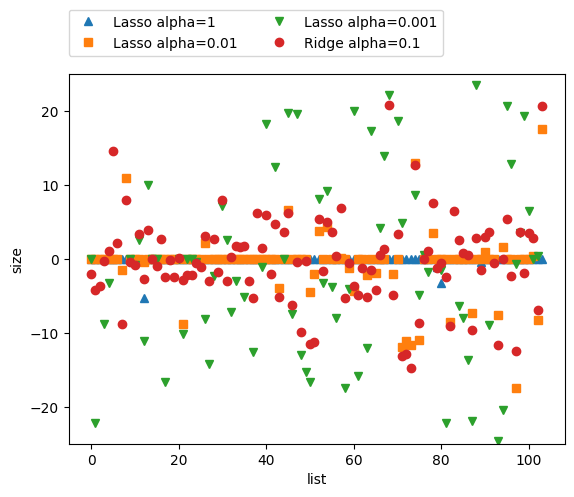

In [24]:
ridge = Ridge().fit(X_train,y_train)
ridge01 = Ridge(alpha = 0.2).fit(X_train,y_train)

plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") 

plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("list")
plt.ylabel("size")

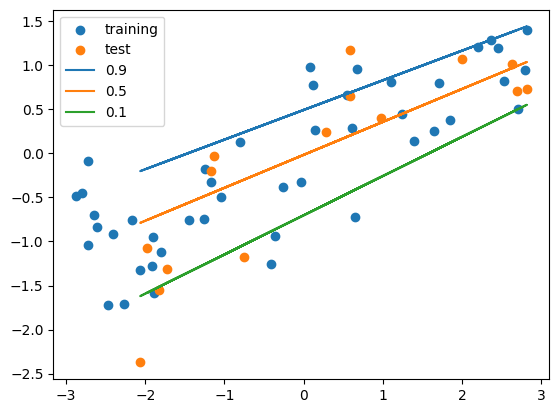

In [30]:
from sklearn.linear_model import QuantileRegressor

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

pred_up = QuantileRegressor(quantile=0.9,alpha=0.01).fit(X_train,y_train).predict(X_test)
pred_med = QuantileRegressor(quantile=0.5,alpha=0.01).fit(X_train,y_train).predict(X_test)
pred_low = QuantileRegressor(quantile=0.1,alpha=0.01).fit(X_train,y_train).predict(X_test)

plt.scatter(X_train,y_train,label='training')
plt.scatter(X_test,y_test,label='test')
plt.plot(X_test, pred_up,label='0.9')
plt.plot(X_test, pred_med,label='0.5')
plt.plot(X_test, pred_low,label='0.1')
plt.legend()
plt.show()